In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import

In [5]:
df = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [6]:
df = df.iloc[:, :10]
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons


In [7]:
df.shape

(8809, 10)

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(8809, 10)

The dataset does not have duplicates but there are some missing values. We won't be using the columns with much missing values so it wouldn't be a problem.

## Exploratory Data Analysis

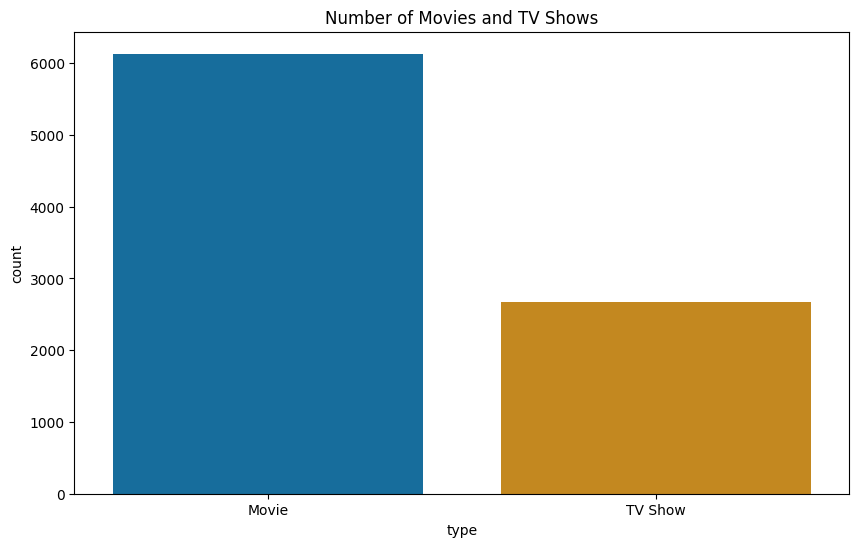

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['type'], data=df, palette='colorblind')
plt.title('Number of Movies and TV Shows')
plt.show()

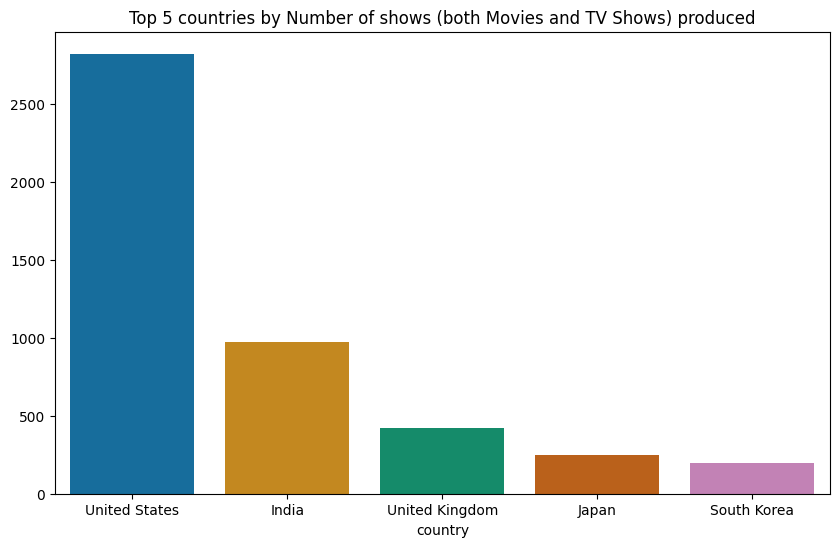

In [12]:
country_counts = df['country'].value_counts()
top_5_countries = country_counts.nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette='colorblind')

plt.title('Top 5 countries by Number of shows (both Movies and TV Shows) produced')
plt.show()

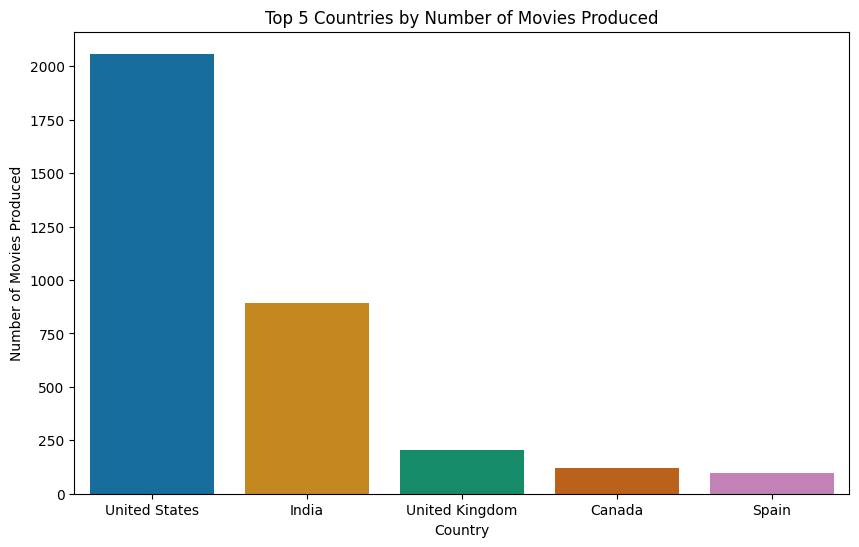

In [13]:
# Plot for Movies
movies_df = df[df['type'] == 'Movie']

top_5_movies = movies_df['country'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_movies.index, y=top_5_movies.values, palette='colorblind')
plt.xlabel('Country')
plt.ylabel('Number of Movies Produced')
plt.title('Top 5 Countries by Number of Movies Produced')
plt.show()

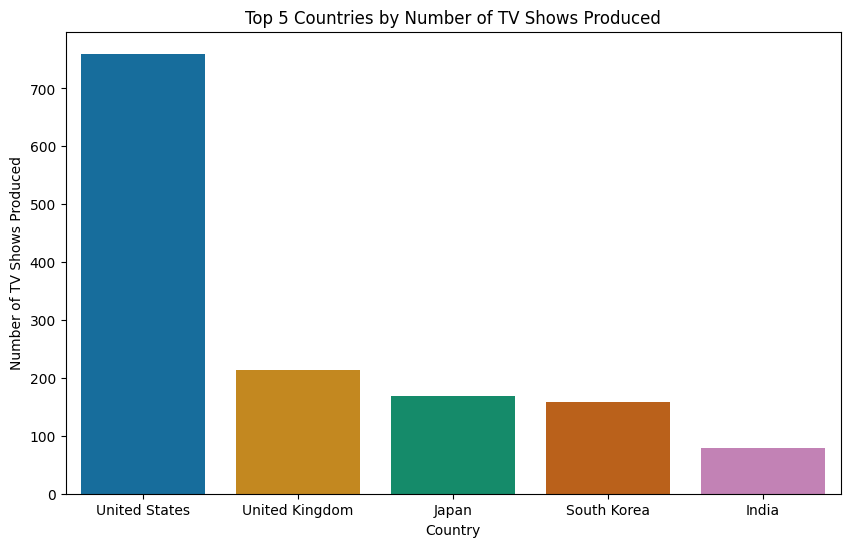

In [14]:
# Plot for TV Shows
tv_shows_df = df[df['type'] == 'TV Show']

top_5_tv_shows = tv_shows_df['country'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_tv_shows.index, y=top_5_tv_shows.values, palette='colorblind')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows Produced')
plt.title('Top 5 Countries by Number of TV Shows Produced')
plt.show()

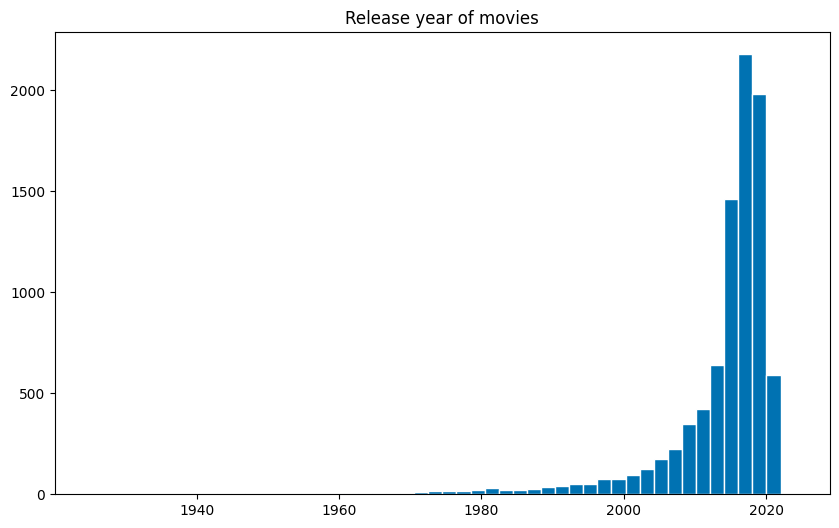

In [15]:
plt.figure(figsize=(10,6))
plt.hist(df['release_year'], bins=50, color='#0072B2', edgecolor='white')
plt.title('Release year of movies')
plt.show()

In [16]:
df.info()
movies_df['duration'] = movies_df['duration'].astype(str)

movies_df.loc[:, 'duration'] = pd.to_numeric(movies_df['duration'].str.extract(r'(\d+)')[0], errors='coerce')

movies_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.3+ KB


/var/folders/r3/xx0q_7g13k3518sncgd3clm00000gn/T/ipykernel_47318/2390501929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'] = movies_df['duration'].astype(str)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127.0


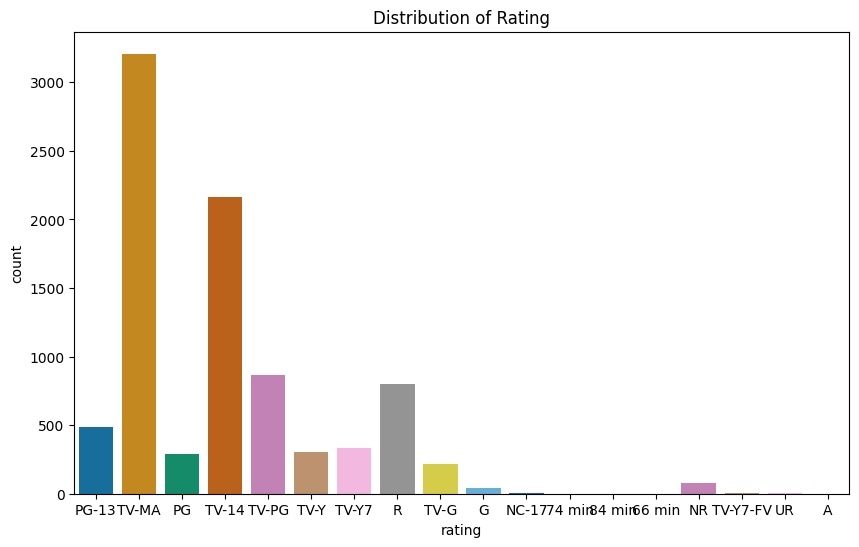

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['rating'], data=df, palette='colorblind')
plt.title('Distribution of Rating')
plt.show()

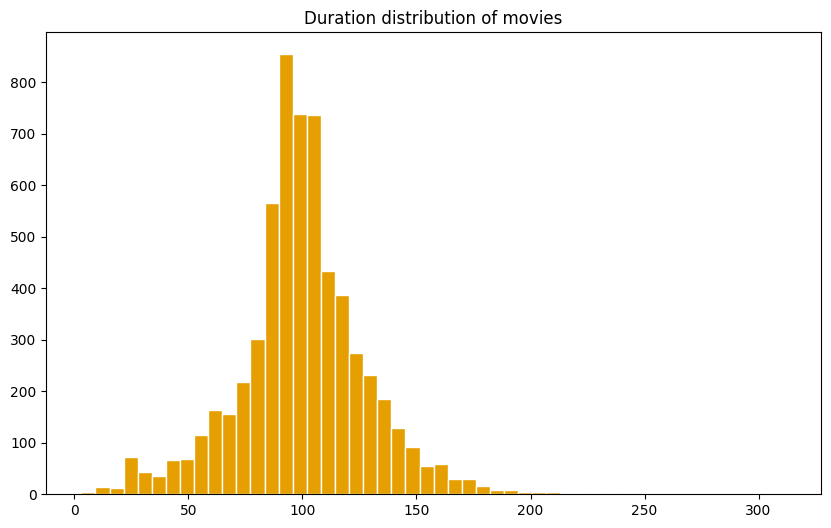

In [18]:
plt.figure(figsize=(10,6))
plt.hist(movies_df['duration'], bins=50, color='#E69F00', edgecolor='white')
plt.title('Duration distribution of movies')
plt.show()